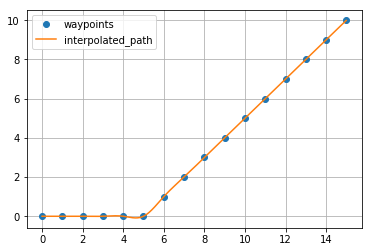

In [9]:
#!/usr/bin/env/python 
# -*- coding: utf-8 -*-


"""
Waypoint Planner

This script takes waypoints as input then interpolates the path
Author: Hasan Şener <hsener3@ford.com.tr> 

"""
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import interpolate
from math import atan2, cos, sin

#%matplotlib inline 


# import waypoints manually 
#TODO : import waypoint from excel / csv file 

x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
y = np.array([0,0,0,0,0,0,1,2,3,4,5,6,7,8,9,10])

# select interpolation method 
"""Specifies the kind of interpolation as a string (‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point) or as an integer specifying the order of the spline interpolator to use. Default is ‘linear’."""

f = interpolate.interp1d(x, y, kind='cubic')

xnew = np.arange(x[0], x[-1], 0.01)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.legend(['waypoints','interpolated_path'],loc='best')
plt.grid()


#create yaw variable / create zero vector for memory allocation 
yaw = np.zeros(len(xnew))

#find yaw angles (radians)

t = 1 #counter for loop - start from 1 
for t in range(len(xnew) - 1): 
    x_forward = xnew[t+1];
    x_backward = xnew[t-1];
    y_forward = ynew[t+1];
    y_backward = ynew[t-1];

    yaw[t+1] = atan2(y_forward-y_backward, x_forward-x_backward) 

yaw[0] = yaw[1]    #equalize first and second yaw
yaw[-1] = yaw[-2]  #equalize last and previous yaw



# clear file contents 
open('planned_path.xlsx', 'w').close()

# re open for appending text 
file = open('planned_path.xlsx', 'a')

# write to excel file use [tab] as delimiter 

i = 0 #counter for loop 
if len(xnew) == len(ynew):    
    for i in range(len(xnew)):
        coord2write = str(xnew[i]) + '\t' + str(ynew[i]) + '\t' + str(yaw[i]) + '\n'
        file.write(coord2write)
file.close()

#fig, ax = plt.subplots()
plt.show()  


In [109]:
print(len(xnew))
print(len(ynew))
print(len(yaw))

1500
1500
1500
